In [16]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

Read the file breast cancer

In [17]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

 Print the feature names and the number of features in this dataset

In [18]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Print out the target and examine the meaning of the target and the distribution of the target

In [19]:
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['diagnosis'] = breast_cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [20]:
df.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [21]:
len(df.columns)

31

**Examining the Relationship between Features and Target**  
At this juncture, it is useful to be able to visualize how each feature affects the diagnosis — whether a tumor is malignant or benign. So let's plot a histogram for each feature and then differentiate the malignant and benign tumors using color:

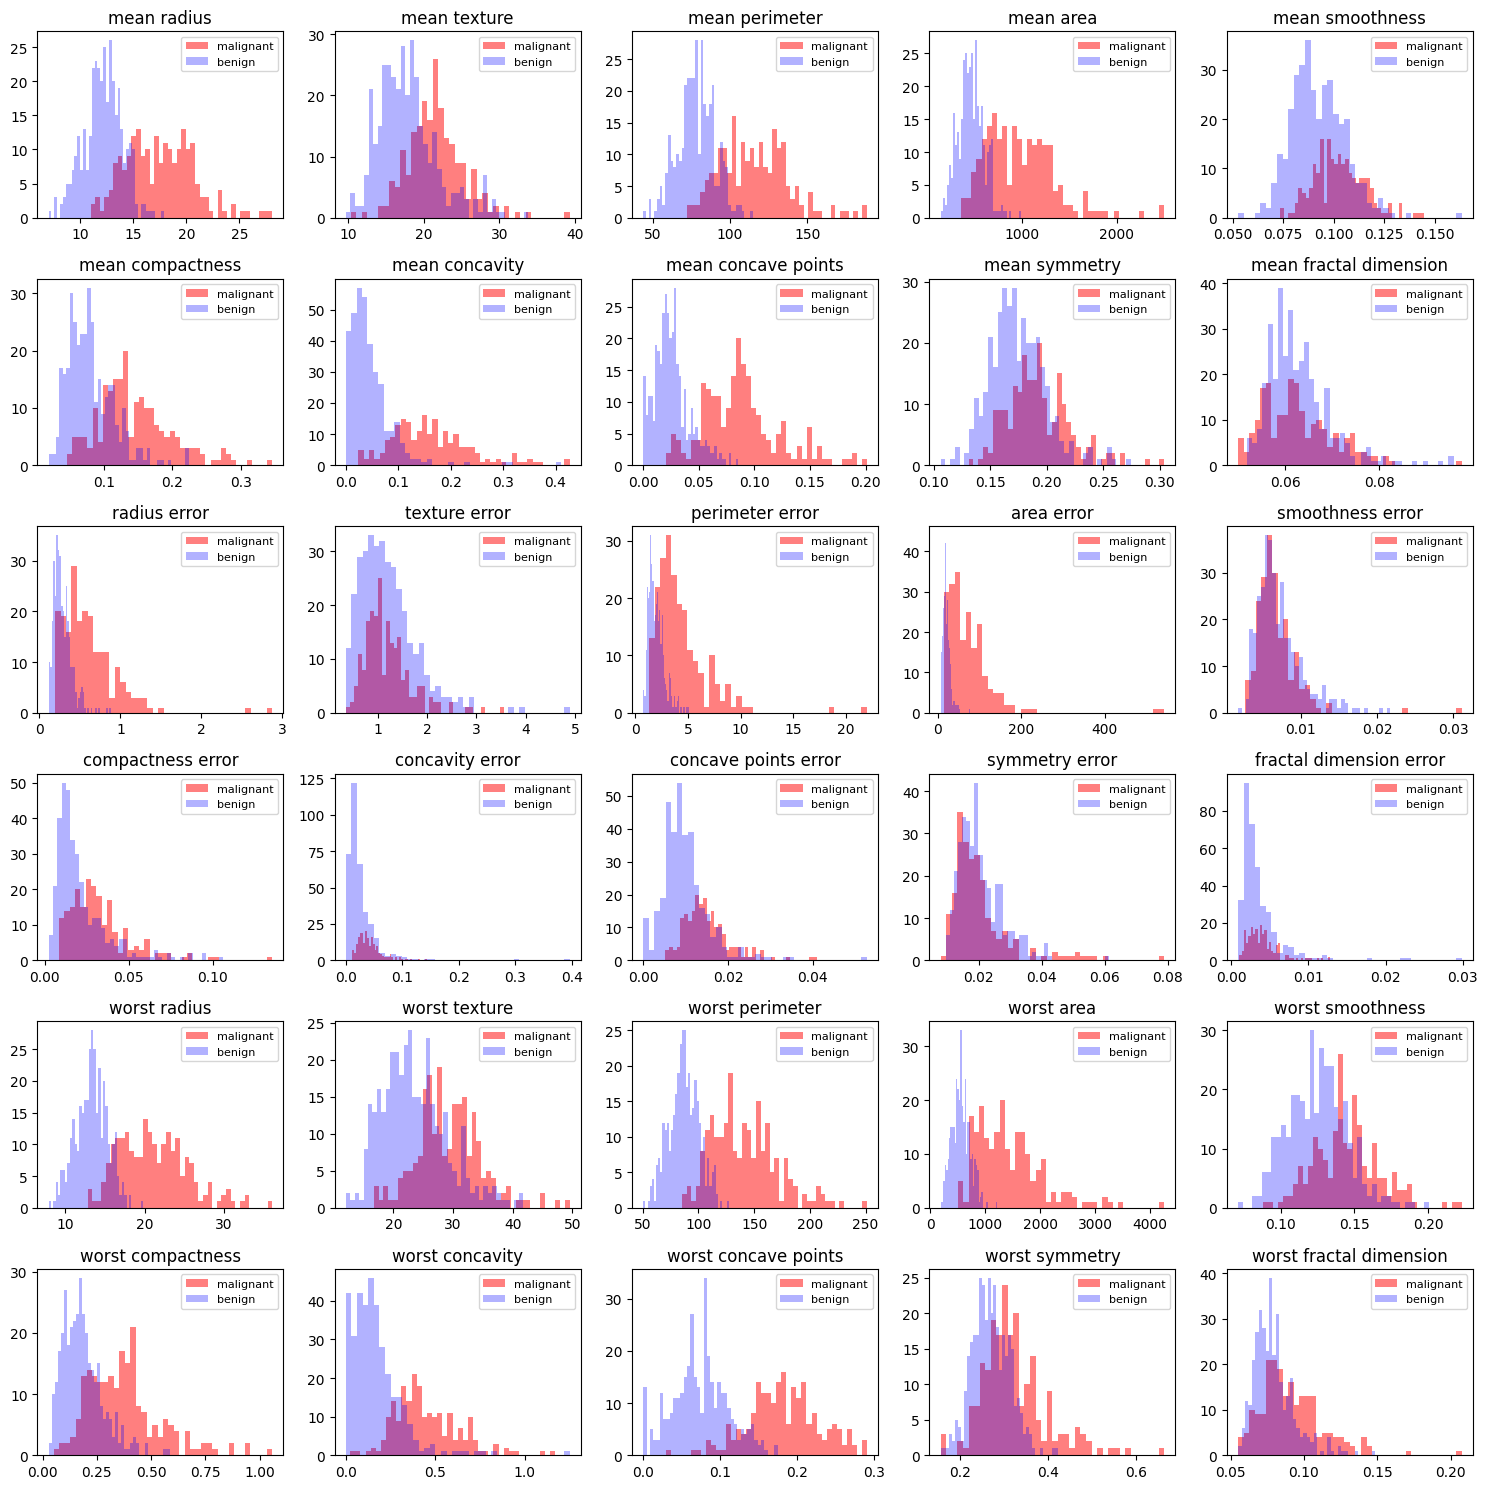

In [22]:
import numpy as np
import matplotlib.pyplot as plt
_, axes = plt.subplots(6,5, figsize=(15, 15))
malignant = breast_cancer.data[breast_cancer.target==0]
benign = breast_cancer.data[breast_cancer.target==1]
ax = axes.ravel()                     # flatten the 2D array
for i in range(30):                   # for each of the 30 features
    bins = 40
    #---plot histogram for each feature---
    ax[i].hist(malignant[:,i], bins=bins, color='r', alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color='b', alpha=0.3)
    #---set the title---
    ax[i].set_title(breast_cancer.feature_names[i], fontsize=12)    
    #---display the legend---
    ax[i].legend(['malignant','benign'], loc='best', fontsize=8)
    
plt.tight_layout()
plt.show()

For each feature, if two histograms are separate, this means that the feature is important and it directly affects the target (diagnosis). For example, if you look at the histogram for the mean radius feature, you will observe that the larger the tumour, the more likely that the tumor is malignant (red)  
On the other hand, the smoothness error feature doesn’t really tell you whether a tumor is malignant or benign

**Load the data into a dataframe**

In [23]:
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['diagnosis'] = breast_cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Method 1 — Training the Model using all the Features**  
Before we perform PCA on the dataset, let's use logistic regression to train a model using all the 30 features in the dataset and see how well it performs.

What is X? What is y?

In [24]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

Standardize the features

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

What is X_train, X_test, y_train, y_test?  
Train the model. What is the accuracy?

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
log_reg = LogisticRegression(max_iter=5000)

log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9824561403508771

**Applying Principal Component Analysis (PCA)**

Calculate the explained variances and create the elbow plot

In [27]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

Text(0, 0.5, 'Explained variance')

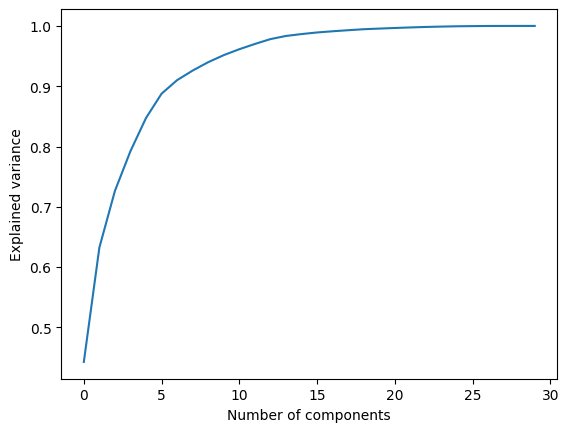

In [31]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

You can interpret the explained variances as follows:

- The first component alone captures about 44% variability in the data
- The second one captures about 19% variability in the data and so on.
- The 30 components altogether capture 100% variability in the data.




Text(0, 0.5, 'Explained variance')

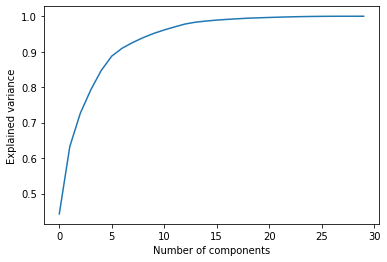

Apply PCA to find the desired number of components based on the desired explained variance of 85%

In [35]:
pca = PCA(n_components=0.85)
pca.fit(X_scaled)
print(f"Number of components: {len(pca.explained_variance_ratio_)}")

Number of components: 6


**Creating a Machine Learning Pipeline**  
Create a machine learning pipeline to formalize the entire process

In [47]:
model = Pipeline([
    ('std_scaler', StandardScaler()), 
    ('pca',PCA(n_components=0.95)), 
    ('log_reg', LogisticRegression(max_iter=5000))
    ])

What is X_train, X_test, y_train, y_test?  
Train the model. What is the accuracy?

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9941520467836257